데이터 : IMDB 리뷰 데이터셋

타깃 : 0(부정), 1(긍정)

# 임포트

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 데이터셋 준비

## 데이터셋 로드

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500)

## 데이터 살펴보기

In [3]:
#훈련 세트와 테스트 세트의 크기 확인
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [4]:
#첫 번째 리뷰의 길이 출력
print(len(train_input[0]))

218


In [5]:
#두 번째 리뷰의 길이 출력
print(len(train_input[1]))

189


In [6]:
#첫 번째 리뷰 내용 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


텐서플로의 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다

어휘 사전에 없는 단어는 2로 나타남

In [7]:
print(train_target.shape)

(25000,)


In [8]:
#타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


## 훈련 세트에서 검증 세트 나누기

In [9]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [10]:
print(train_input.shape, val_input.shape)

(20000,) (5000,)


## 훈련 세트 살펴보기

In [11]:
#각 리뷰의 길이를 계산해 넘파이 배열에 담기
lengths = np.array([len(x) for x in train_input])

#리뷰 길이의 평균값과 중간값 구하기
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


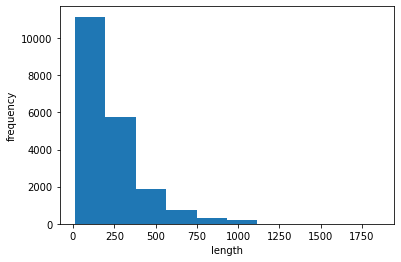

In [12]:
#히스토그램 그리기
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

리뷰 길이가 한쪽으로 치우쳤다

여기서는 100개의 단어만 사용하겠다

## 데이터 길이 맞추기

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [15]:
#train_seq 크기 확인
print(train_seq.shape, val_seq.shape)

(20000, 100) (5000, 100)


In [19]:
#앞에 0이 채워진 것을 볼 수 있다
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


# 순환 신경망 만들기 SimpleRNN

## 모델 정의. 임베딩

SimpleRNN

In [26]:
model = keras.Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

Embedding 500 : 어휘 사전 크기 / 16 : 임베딩 벡트 크기

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [28]:
rmsprop = RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 33s 102ms/step - loss: 0.6951 - accuracy: 0.5062 - val_loss: 0.6919 - val_accuracy: 0.5158
Epoch 2/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6910 - accuracy: 0.5231 - val_loss: 0.6910 - val_accuracy: 0.5190
Epoch 3/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6885 - accuracy: 0.5333 - val_loss: 0.6902 - val_accuracy: 0.5272
Epoch 4/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6859 - accuracy: 0.5482 - val_loss: 0.6898 - val_accuracy: 0.5310
Epoch 5/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6830 - accuracy: 0.5602 - val_loss: 0.6898 - val_accuracy: 0.5268
Epoch 6/100
313/313 [==============================] - 31s 99ms/step - loss: 0.6792 - accuracy: 0.5714 - val_loss: 0.6877 - val_accuracy: 0.5360
Epoch 7/100
313/313 [==============================] - 31s 97ms/step - loss: 0.6669 - accuracy: 0.6230 - val_loss: 0.6701 - val_a

## 손실 그래프

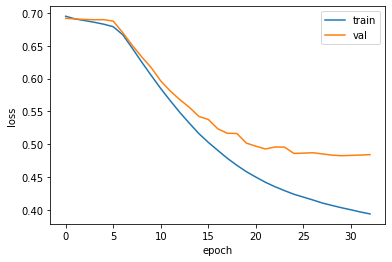

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증 손실이 더 감소되지 않아 훈련이 적절히 조기 종료된 것 같다

이에 비해 훈련 손실은 계속 감소한다

# LSTM

Long Short-Term Memory

단기 기억을 오래 기억하기 위해 고안됨

LSTM 셀에는 작은 셀이 4개 있음

## 모델 정의

In [30]:
from tensorflow.keras.layers import LSTM
model = keras.Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [32]:
rmsprop = RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 7s 11ms/step - loss: 0.6925 - accuracy: 0.5463 - val_loss: 0.6915 - val_accuracy: 0.5886
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6901 - accuracy: 0.6123 - val_loss: 0.6883 - val_accuracy: 0.6330
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6843 - accuracy: 0.6581 - val_loss: 0.6793 - val_accuracy: 0.6622
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6637 - accuracy: 0.6869 - val_loss: 0.6397 - val_accuracy: 0.7040
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5973 - accuracy: 0.7272 - val_loss: 0.5814 - val_accuracy: 0.7266
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5639 - accuracy: 0.7423 - val_loss: 0.5600 - val_accuracy: 0.7444
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5433 - accuracy: 0.7556 - val_loss: 0.5405 - val_accuracy: 0

## 손실 그래프

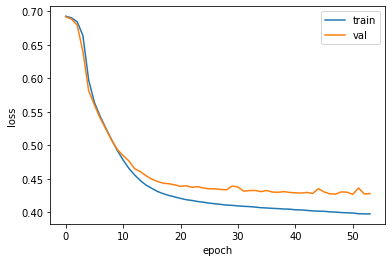

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 드롭아웃 적용하기

순환층은 자체적으로 드롭아웃 기능을 제공

Epoch 1/100
313/313 [==============================] - 5s 11ms/step - loss: 0.6929 - accuracy: 0.5063 - val_loss: 0.6926 - val_accuracy: 0.5384
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6918 - accuracy: 0.5663 - val_loss: 0.6910 - val_accuracy: 0.5978
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6889 - accuracy: 0.6201 - val_loss: 0.6853 - val_accuracy: 0.6154
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6780 - accuracy: 0.6258 - val_loss: 0.6644 - val_accuracy: 0.6520
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6493 - accuracy: 0.7107 - val_loss: 0.6346 - val_accuracy: 0.7348
Epoch 6/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6259 - accuracy: 0.7325 - val_loss: 0.6148 - val_accuracy: 0.7322
Epoch 7/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6089 - accuracy: 0.7397 - val_loss: 0.6018 - val_accuracy: 0.73

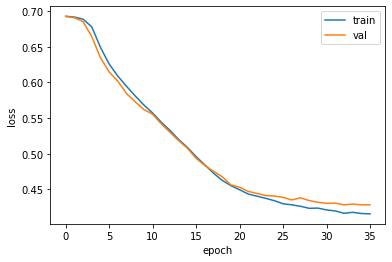

In [34]:
from tensorflow.keras.layers import LSTM
model = keras.Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(LSTM(8, dropout=0.3))    #dropout 추가
model.add(Dense(1, activation='sigmoid'))

rmsprop = RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

LSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같다

## 순환층 2개 연결

순환층 연결 주의할 점 : 앞쪽 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야한다

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 0.6930 - accuracy: 0.5192 - val_loss: 0.6928 - val_accuracy: 0.5172
Epoch 2/100
313/313 [===================

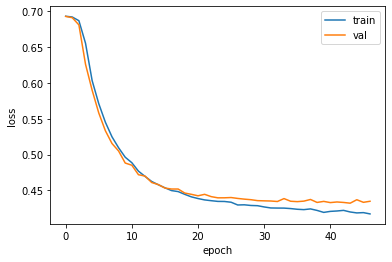

In [36]:
from tensorflow.keras.layers import LSTM
model = keras.Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(LSTM(8, dropout=0.3, return_sequences=True))    #return_sequences=True 추가
model.add(LSTM(8, dropout=0.3))    #LSTM 층 하나 더 추가
model.add(Dense(1, activation='sigmoid'))

model.summary()

rmsprop = RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

일반적으로 순환층을 쌓으면 성능이 높아진다

# GRU

Gated Recurrent Unit

LSTM을 간소화

GRU 셀에는 작은 셀이 3개 있음

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6923 - accuracy: 0.5321 - val_loss: 0.6918 - val_accuracy: 0.5282
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6904 - accuracy: 0.5563 - val_loss: 0.6897 - val_accuracy: 0.5506
Epoch 3/100
313/313 [========

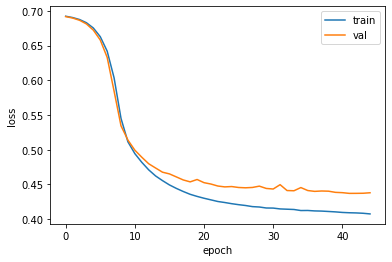

In [37]:
from tensorflow.keras.layers import GRU
model = keras.Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(GRU(8))
model.add(Dense(1, activation='sigmoid'))

model.summary()

rmsprop = RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

드롭아웃을 사용하지 않았기 때문에 이전보다 훈련 손실과 검증 손실 사이에 차이가 있지만 훈련 과정이 잘 수렴되고 있다